In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# 데이터 프레임 읽어온 후 합계 frame만 추출
ex_data=pd.read_excel("남북한발전전력량.xlsx")
ex_sum_data=ex_data.iloc[[0,5],2:]

# index에 이름 지정 및 int 형 변환
ex_sum_data.index=['south','north']
ex_sum_data.astype(int)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
north,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


<AxesSubplot:>

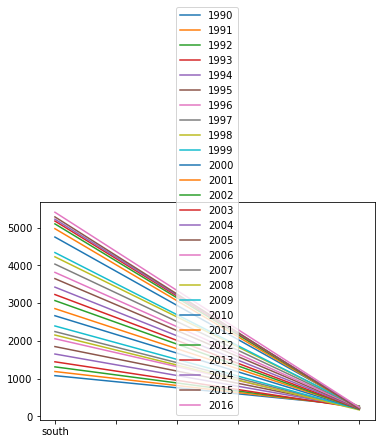

In [11]:
# T(전치)x
ex_sum_data.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

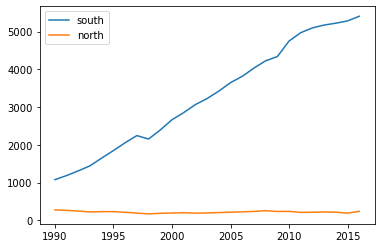

In [9]:
ex_sum_data=ex_sum_data.T
ex_sum_data.plot()

plt.show

In [4]:
# iris=붓꽃 data
data_model = sns.load_dataset("iris")
data_model
#수술 암술 길이 넓이 등등

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


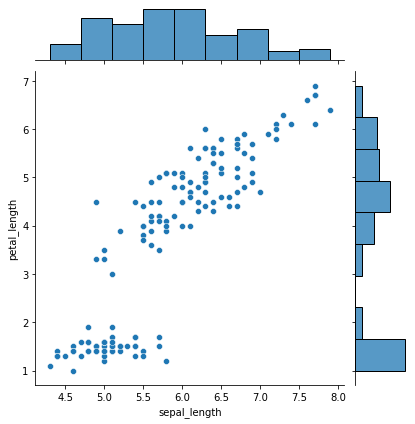

In [12]:
# 꽃잎의 길이와 꽃받침의 길이 간의 상관간계 
# x와 y의 관계
jop1= sns.jointplot(x="sepal_length", y="petal_length", kind="scatter", data=data_model)
# sepal_length가 증가할 수록 petal_length가 증가하는 경향이 있다. (ba그래프는 histogram)

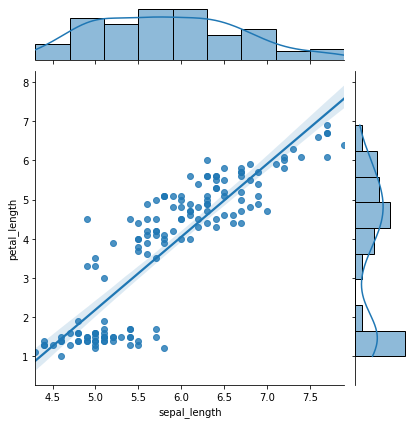

In [13]:
jop2= sns.jointplot(x="sepal_length", y="petal_length", kind="reg", data=data_model)
# reg=regression 즉 회귀 -> 회귀선, 그림자는 회귀선의 분산
# reg가 flow등 보여주는 내용이 scatter보다 많음(linear regression과 )

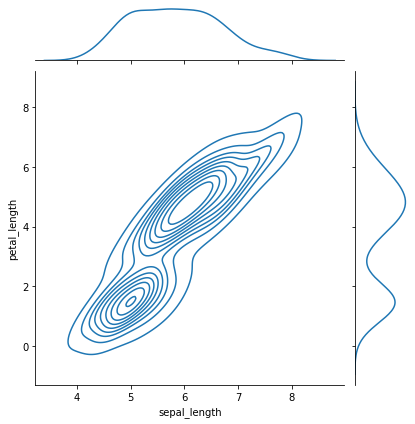

In [14]:
jop3= sns.jointplot(x="sepal_length", y="petal_length", kind="kde", data=data_model)
# 등고선 그래프
# sepal과 petal과의 관계를 범위로 보여줌
# 뭉쳐있을수록 높다
# 양 옆 그래프는 적분값을 줌
# 잘 쓰진 않음

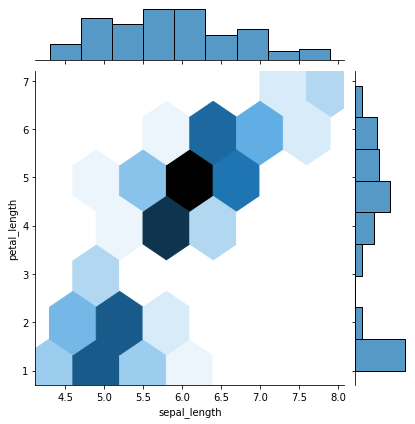

In [15]:
jop4= sns.jointplot(x="sepal_length", y="petal_length", kind="hex", data=data_model)
# 잘쓰진 않음

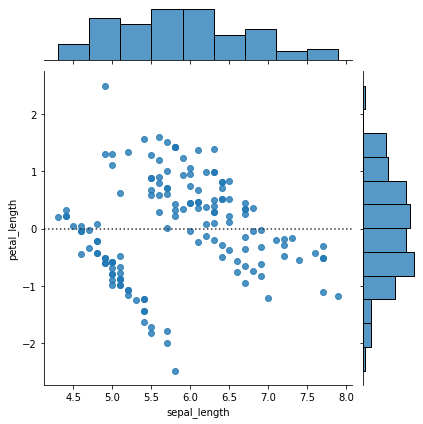

In [16]:
jop5= sns.jointplot(x="sepal_length", y="petal_length", kind="resid", data=data_model)
# sepal과 petal의 관점에서 잔차 즉 엡실론을 보여줌

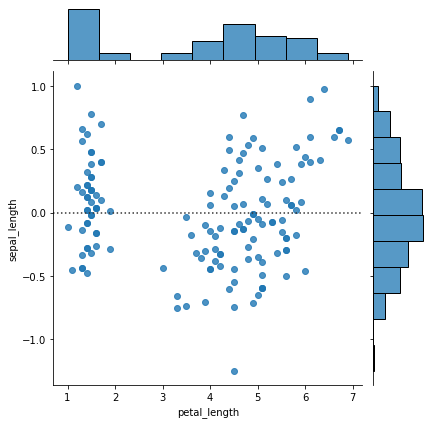

In [17]:
jop6= sns.jointplot(x="petal_length", y="sepal_length", kind="resid", data=data_model)

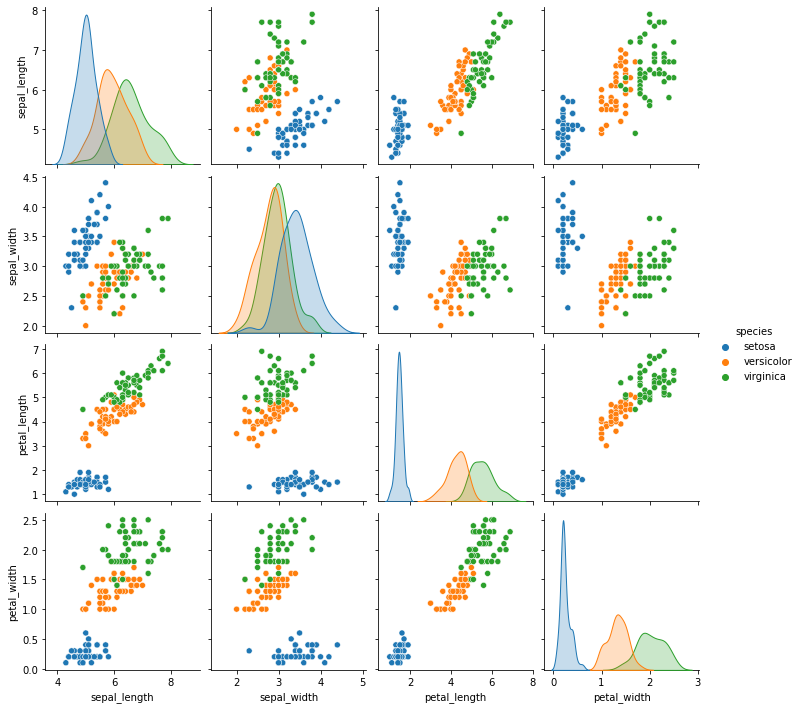

In [22]:
# 중요
sns.pairplot(data_model, hue="species")

### pearson's correlation coefficient
- 양적인 두 변수 간의 관계
- case 1 + x 증가 y 증가 
- case 2 - x증가 y 감소
- case 3 x x,y의 관계가 없다. 
- corr은 correlatiom의 약자
- 상관계수 [-1~1] 0이면 관계가 없다.
- +-0.3이상이면 관계가 있지만 정도는 약하다.

In [21]:
data_model.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### outliar(이상치)
- 전체적인 Data/Model range에서 동떨어진 관측값으로, Model을 크게 왜곡 시킬 가능성이 있음.
- 일반적으로 6σ(표준편차) 즉 +- 3표준편차에 해당하는 값을 이상치라고 봄
- 목적과 자료에따라 3σ,4σ,5σ로도 설정.

### 가장 직관적인 방법은 시각화
- 시각화를 통해서 이상치를 주관적을 확인할 수 있음

### outliar을 찾았다면
- a. 단순 삭제 <br/> Human error에 의한 경우 해당 관측치를 삭제하면 됨. <br/> ex.오타,주관식 설문 등의 비현실적인 응답, 처리과정에서의 error
- b. 대체 <br/> 결측값과 유사하게 다른 변수들을 사용해서 예측 model을 만듬?-> 이상값을 예측한 후 해당 값으로 대체. <br/> 이상값이 자연발생한 경우 delete/replace를 통해 Model을 만든다면? -> 현상/예측을 잘 설명할 수 없을 수도 있음.
- c. 이상치가 자연발생 했을 경우의 방법 <br/> 1. 변수화<br/>2. resampling<br/>3. case 분리 해석


<AxesSubplot:>

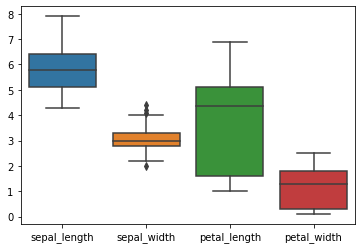

In [23]:
# Boxplot을 통한 이상치 검색
sns.boxplot(data=data_model)